In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, sys, lzma, os

datadir = 'data'

sys.path.insert(0,'C:/git/StrathLab/libs') #Lab PC
sys.path.insert(0,'D:/Repositories/StrathLab/libs') #XMG
import StrathLabToolkit as lab
datadir_full = os.path.join(os.getcwd(),datadir)

Found 1 datafiles in: D:\Repositories\StrathLab\jupyter_acquisition_template\data


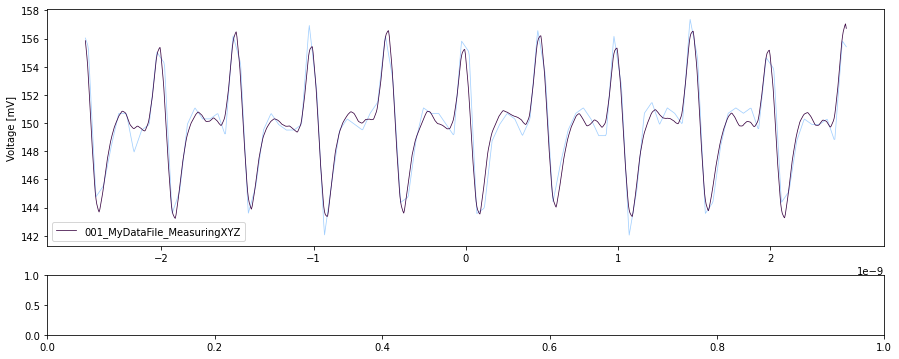

In [17]:
## Visualize contents of a recorded measurement datafiles
lookup = '0' ##

######
datafiles = lab.Get_Files_From_Dir(datadir_full)
datafiles = [entry for entry in datafiles if '.pkl.lz' in entry] 
dfile_count=len(datafiles)
print(f'Found {dfile_count} datafiles in: {datadir_full}')

###### Inspect contents of datafile
#with lzma.open((os.path.join(datadir_full,datafiles[0])),"rb") as f:
#    data = pickle.load(f)
#    lab.Visualise_Data_Dict(data)
######

if dfile_count<2:
    fig,ax = plt.subplots(2,1,figsize=(15,6),gridspec_kw={'height_ratios':(1,0.25)})
else:
    fig,ax = plt.subplots(dfile_count,1,figsize=(15,dfile_count*3))
    
ii=0
for dfile in datafiles:
    if lookup in dfile:
        with lzma.open((os.path.join(datadir_full,dfile)),"rb") as f:
            data = pickle.load(f)
            ax[ii].plot(np.linspace(*data.readout_osc_0.xpar),np.asarray(data.readout_osc_0['y0'])*1e3,lw=0.75,color='xkcd:baby blue')
            ax[ii].plot(np.linspace(*data.readout_osc_0.xpar),data.readout_osc_0.ymean*1e3,lw=0.75,color='xkcd:deep purple',label=dfile[12:-7])
            ax[ii].legend(loc='lower left')
            ax[ii].set_ylabel('Voltage [mV]')
            ii=ii+1